In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

## Load and preprocess the MNIST dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

## Define the CNN model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0380 - val_accuracy: 0.9895
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0287 - val_accuracy: 0.9912
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.0273 - val_accuracy: 0.9925
Epoch 4/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0298 - val_accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0584 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0558 - val_accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.0322 -

## Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0487 - accuracy: 0.9892
Test Accuracy: 0.9891999959945679


##  Plot training history

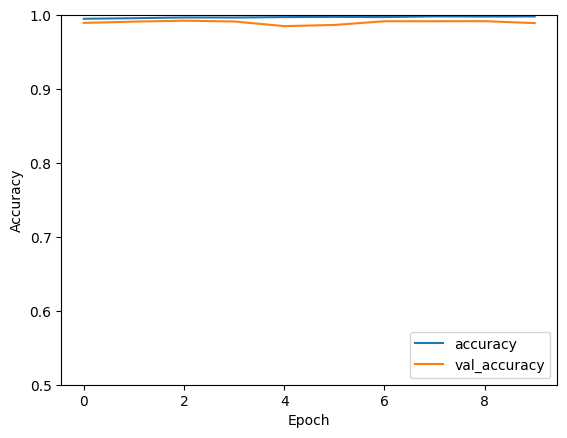

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()